In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [5]:
df.drop(columns = ['year', 'month'], inplace = True)



In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

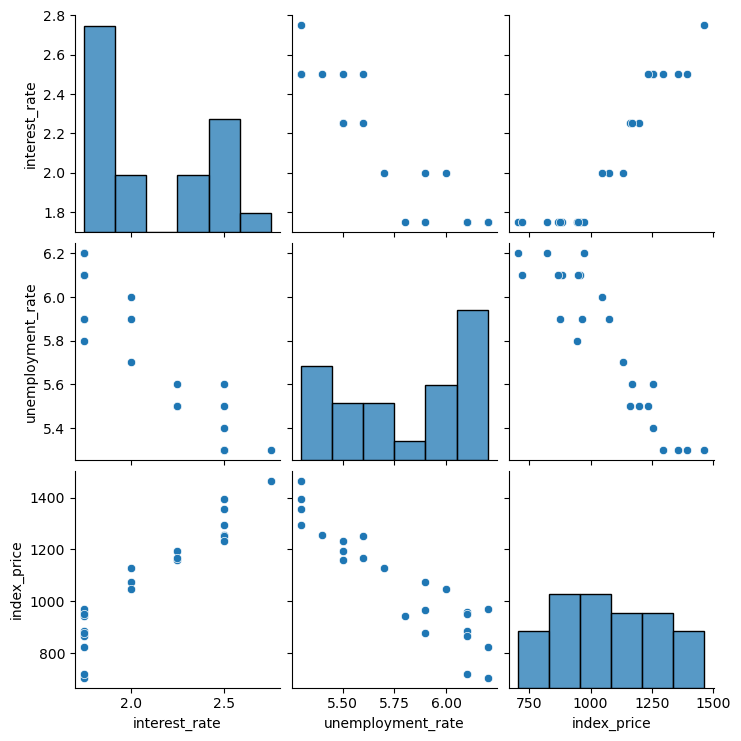

In [8]:
import seaborn as sns
sns.pairplot(df)

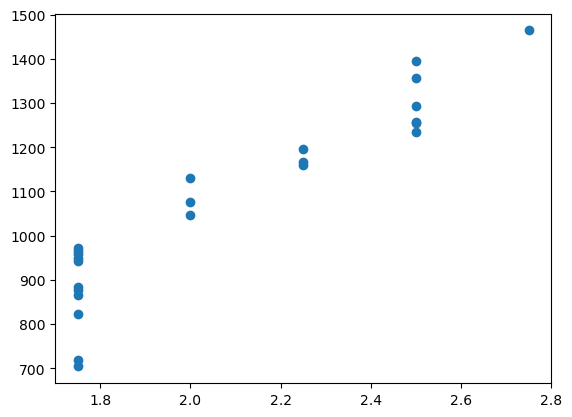

In [9]:
plt.scatter(df['interest_rate'], df['index_price'])

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [12]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.33, random_state= 42)

In [15]:
x_train

,interest_rate,unemployment_rate
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2
17,1.75,6.1
20,1.75,5.9


<Axes: xlabel='interest_rate', ylabel='index_price'>

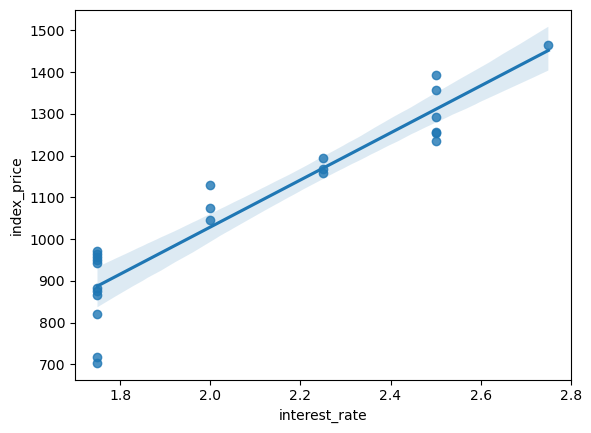

In [16]:
import seaborn as sns
sns.regplot(data=df, x= df['interest_rate'], y=df['index_price'])

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()

In [22]:
model = reg.fit(x_train, y_train)

In [23]:
y_pred = model.predict(x_test)

In [24]:
y_pred

array([1141.63549621,  787.98167849, 1339.94389614,  819.05076205,
        949.27404557, 1110.56641265,  881.18892917, 1271.85877973])

In [25]:
# cross val score
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(reg, x_train, y_train, scoring = 'neg_mean_squared_error', cv= 3)

In [26]:
cross_validation

array([ -8717.80560752, -14492.68332185,  -2542.85216034])

In [27]:
np.mean(cross_validation)

-8584.447029905592

In [28]:
# performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse= mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('RMSE: ', rmse)
print('r2_score: ', r2)

MSE:  11792.511387420975
MAE:  97.18750000000011
RMSE:  108.59333030817766
r2_score:  0.684817433917698


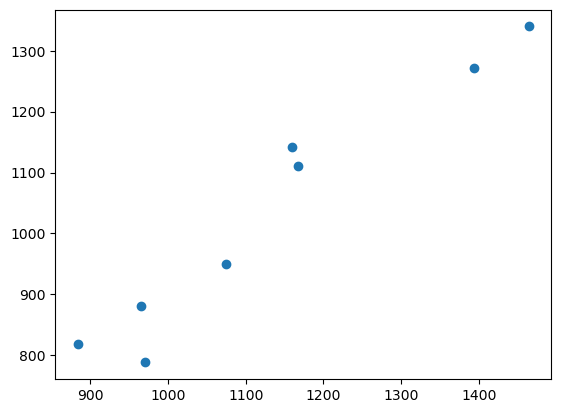

In [29]:
# Assumption 
plt.scatter(y_test, y_pred)

In [ ]:
residuals = y_test - y_pred